## Relatório de dados


**Análise exploratória de dados como molde de avaliação para a matéria de Gestão de dados do Uniceub**

Relatório de EDA sobre dados da transparência do Governo Brasileiro

**R.A**: 22200115
**Nome**: Leão Pereira Neto



In [239]:
#importação das bibliotecas necessários para todo o trabalho
import requests
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

## Do plano estratégico do trabalho

A ideia por tras deste trabalho é fazer uma compilação de arquivos de modo a descobrir se os deputados com maiores despesas também sáoos que mais aparecem em eventos e fazem um maior número de proposições já que a ideia de representação popular, em sentido comum, envolve tanto a questão de defender os ideias daqueles que votaram no representante, exercendo assim a palavra e defendendo proposições junto ao orgao representativo, ainda mais, envolve uma satisfação publica sobre suas ações e sua presença em diversos eventos para se aproximar dos seus eleitores. 

Para tanto foram selecionados alguns dados abertos direto da Câmara dos Deputados onde se encontram todos os dados referentes ao exercicio da atividade de Deputado Federal. Fora selecionados os representantes da 55º legislatura. 

In [240]:
#leitura do primeiro arquivo
df = pd.read_excel('Ano-2019.xlsx')

C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [241]:
df

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,0,NaN,NaN,1554246,NaN,NaN,NaN,2812,6738121,https://www.camara.leg.br/cota-parlamentar/not...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,0,NaN,NaN,1570078,NaN,NaN,NaN,2812,6769606,https://www.camara.leg.br/cota-parlamentar/not...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,0,NaN,NaN,1570503,NaN,NaN,NaN,2812,6771099,https://www.camara.leg.br/cota-parlamentar/not...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,0,NaN,NaN,1579375,NaN,NaN,NaN,2812,6793690,https://www.camara.leg.br/cota-parlamentar/not...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,0,NaN,NaN,1590980,NaN,NaN,NaN,2812,6821674,https://www.camara.leg.br/cota-parlamentar/not...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289448,Dr. Gonçalo,5.461154e+09,212625.0,548.0,2019,MA,REPUBLICANOS,56,999,PASSAGEM AÉREA - RPA,...,0,Dr. Gonçalo,BSB/THE,0,0.0,NaN,NaN,3463,1722569,NaN
289449,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,NaN,NaN,1686035,NaN,NaN,NaN,3465,7035691,https://www.camara.leg.br/cota-parlamentar/doc...
289450,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,9,PASSAGEM AÉREA - REEMBOLSO,...,0,NaN,NaN,1667677,NaN,NaN,NaN,3465,6995992,https://www.camara.leg.br/cota-parlamentar/doc...
289451,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,10,TELEFONIA,...,0,NaN,NaN,0,0.0,NaN,NaN,3465,0,NaN


In [242]:
#primeiro filtro: para selecionar somente aqueles que são da 55 legis.
df_55 = df.loc[df['codLegislatura'] == 55]

In [243]:
df_55

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,0,NaN,NaN,1554246,NaN,NaN,NaN,2812,6738121,https://www.camara.leg.br/cota-parlamentar/not...
171,LIDERANÇA DO PDT,NaN,NaN,NaN,2015,NaN,NaN,55,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,0,NaN,NaN,1555128,NaN,NaN,NaN,2715,6740614,https://www.camara.leg.br/cota-parlamentar/not...
191,LIDERANÇA DO PODEMOS,NaN,NaN,NaN,2015,NaN,NaN,55,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,0,NaN,NaN,1565629,NaN,NaN,NaN,3172,6757348,https://www.camara.leg.br/cota-parlamentar/not...
192,LIDERANÇA DO PODEMOS,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,0,NaN,NaN,1565628,NaN,NaN,NaN,3172,6757356,https://www.camara.leg.br/cota-parlamentar/doc...
267,LIDERANÇA DO PSD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,0,NaN,NaN,1558264,NaN,NaN,NaN,2725,6747304,https://www.camara.leg.br/cota-parlamentar/doc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284567,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,0,CARLA STEPHANINI,CGR/BSB,0,0.0,NaN,NaN,3193,1633765,NaN
284568,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,0,CARLA STEPHANINI,BSB/CGR,0,0.0,NaN,NaN,3193,1633766,NaN
284569,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,0,CARLA STEPHANINI,BSB/UDI,0,0.0,NaN,NaN,3193,1633911,NaN
284570,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,0,CARLA STEPHANINI,CGR/CGH,0,0.0,NaN,NaN,3193,1634711,NaN


## Tratamento dos valores nulos

In [244]:
#Exibição dos valores nulos
df_55.isna().sum()

txNomeParlamentar                0
cpf                             81
ideCadastro                     21
nuCarteiraParlamentar           21
nuLegislatura                    0
sgUF                            21
sgPartido                       21
codLegislatura                   0
numSubCota                       0
txtDescricao                     0
numEspecificacaoSubCota          0
txtDescricaoEspecificacao    11449
txtFornecedor                    0
txtCNPJCPF                       0
txtNumero                        0
indTipoDocumento                 0
datEmissao                     511
vlrDocumento                     0
vlrGlosa                         0
vlrLiquido                       0
numMes                           0
numAno                           0
numParcela                       0
txtPassageiro                10728
txtTrecho                    10746
numLote                          0
numRessarcimento              8338
datPagamentoRestituicao      14640
vlrRestituicao      

In [245]:
#procentagem de nulos
df_55.isna().sum() * 100/len(df_55)

txNomeParlamentar             0.000000
cpf                           0.552034
ideCadastro                   0.143120
nuCarteiraParlamentar         0.143120
nuLegislatura                 0.000000
sgUF                          0.143120
sgPartido                     0.143120
codLegislatura                0.000000
numSubCota                    0.000000
txtDescricao                  0.000000
numEspecificacaoSubCota       0.000000
txtDescricaoEspecificacao    78.027670
txtFornecedor                 0.000000
txtCNPJCPF                    0.000000
txtNumero                     0.000000
indTipoDocumento              0.000000
datEmissao                    3.482587
vlrDocumento                  0.000000
vlrGlosa                      0.000000
vlrLiquido                    0.000000
numMes                        0.000000
numAno                        0.000000
numParcela                    0.000000
txtPassageiro                73.113883
txtTrecho                    73.236557
numLote                  

In [246]:
#filtrando as linhas pelas colunas com menores valores nulos
df55 = df_55.dropna(subset=['cpf', 'datEmissao'])

## Dados a serem retirados

Considerando o objetivo do trabalho e ainda a união de outros arquivos que serão analisados para frente, é preciso retirar algumas colunas que não serão utilizadas aqui.

- numEspecificacaoSubCota
- txtDescricaoEspecificacao
- vlrDocumento (como ainda tem descontos a serem aplicados, o mais interessante é considerar o valor líquido)
- vlrGlosa (alguns descontos que são aplicados ao vlrDocumento)
- numRessarcimento
- datPagamentoRestituicao
- vlrRestituicao
- urlDocumento

Os quatro últimos temos muitos valores vazios e que não serão considerados para os fins desse trabalho, por isso compensa a exclusão da coluna inteira.

In [247]:
#O eixo 0 se refere às linhas e o eixo 1 se refere às colunas
df_gastos = df55.drop(['numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'vlrDocumento', 'vlrGlosa', 'numRessarcimento', 'datPagamentoRestituicao', 'vlrRestituicao', 'urlDocumento'], axis=1)

In [248]:
df_gastos

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,datEmissao,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,nuDeputadoId,ideDocumento
905,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,3,COMBUSTÍVEIS E LUBRIFICANTES.,...,2019-01-23T00:00:00,5990.37,1,2019,0,NaN,NaN,1555348,1973,6741346
906,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2019-01-30T00:00:00,22000.00,1,2019,0,NaN,NaN,1557940,1973,6746499
907,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2019-01-18T00:00:00,5500.00,1,2019,0,NaN,NaN,1555349,1973,6741390
908,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,10,TELEFONIA,...,2019-01-10T00:00:00,0.61,1,2019,0,NaN,NaN,0,1973,0
909,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,10,TELEFONIA,...,2019-02-11T00:00:00,305.59,1,2019,0,NaN,NaN,0,1973,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284566,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,2019-01-16T00:00:00,759.57,1,2019,0,MARZOLA/TARSILA,CGR/BSB,0,3193,1633716
284567,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,2019-01-17T00:00:00,573.57,1,2019,0,CARLA STEPHANINI,CGR/BSB,0,3193,1633765
284568,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,2019-01-17T00:00:00,578.49,1,2019,0,CARLA STEPHANINI,BSB/CGR,0,3193,1633766
284569,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,2019-01-18T00:00:00,704.39,1,2019,0,CARLA STEPHANINI,BSB/UDI,0,3193,1633911


In [249]:
#tentativa de igualar os nomes para facilitar depois o agrupamento
from nameparser import HumanName

def normalizar_nome(nome):
    parsed = HumanName(nome)
    return f"{parsed.title} {parsed.first} {parsed.middle} {parsed.last} {parsed.suffix}".strip()

In [250]:
df_gastos['txNomeParlamentar'] = df_gastos['txNomeParlamentar'].apply(normalizar_nome)

In [251]:
df_gastos

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,datEmissao,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,nuDeputadoId,ideDocumento
905,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,3,COMBUSTÍVEIS E LUBRIFICANTES.,...,2019-01-23T00:00:00,5990.37,1,2019,0,NaN,NaN,1555348,1973,6741346
906,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2019-01-30T00:00:00,22000.00,1,2019,0,NaN,NaN,1557940,1973,6746499
907,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2019-01-18T00:00:00,5500.00,1,2019,0,NaN,NaN,1555349,1973,6741390
908,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,10,TELEFONIA,...,2019-01-10T00:00:00,0.61,1,2019,0,NaN,NaN,0,1973,0
909,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,10,TELEFONIA,...,2019-02-11T00:00:00,305.59,1,2019,0,NaN,NaN,0,1973,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284566,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,2019-01-16T00:00:00,759.57,1,2019,0,MARZOLA/TARSILA,CGR/BSB,0,3193,1633716
284567,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,2019-01-17T00:00:00,573.57,1,2019,0,CARLA STEPHANINI,CGR/BSB,0,3193,1633765
284568,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,2019-01-17T00:00:00,578.49,1,2019,0,CARLA STEPHANINI,BSB/CGR,0,3193,1633766
284569,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,2019-01-18T00:00:00,704.39,1,2019,0,CARLA STEPHANINI,BSB/UDI,0,3193,1633911


In [252]:
lista_gastos = df_gastos.groupby('txtDescricao')['vlrLiquido'].sum().reset_index()
lista_gastos = lista_gastos.sort_values('vlrLiquido', ascending=False)
lista_gastos

,txtDescricao,vlrLiquido
3,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,4694975.10
12,PASSAGEM AÉREA - RPA,3017677.73
8,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,1749248.65
9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,1431468.65
2,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",1366826.14
1,COMBUSTÍVEIS E LUBRIFICANTES.,1118306.71
17,TELEFONIA,429719.99
16,SERVIÇOS POSTAIS,214458.77
11,PASSAGEM AÉREA - REEMBOLSO,149269.42
6,LOCAÇÃO OU FRETAMENTO DE AERONAVES,137990.00


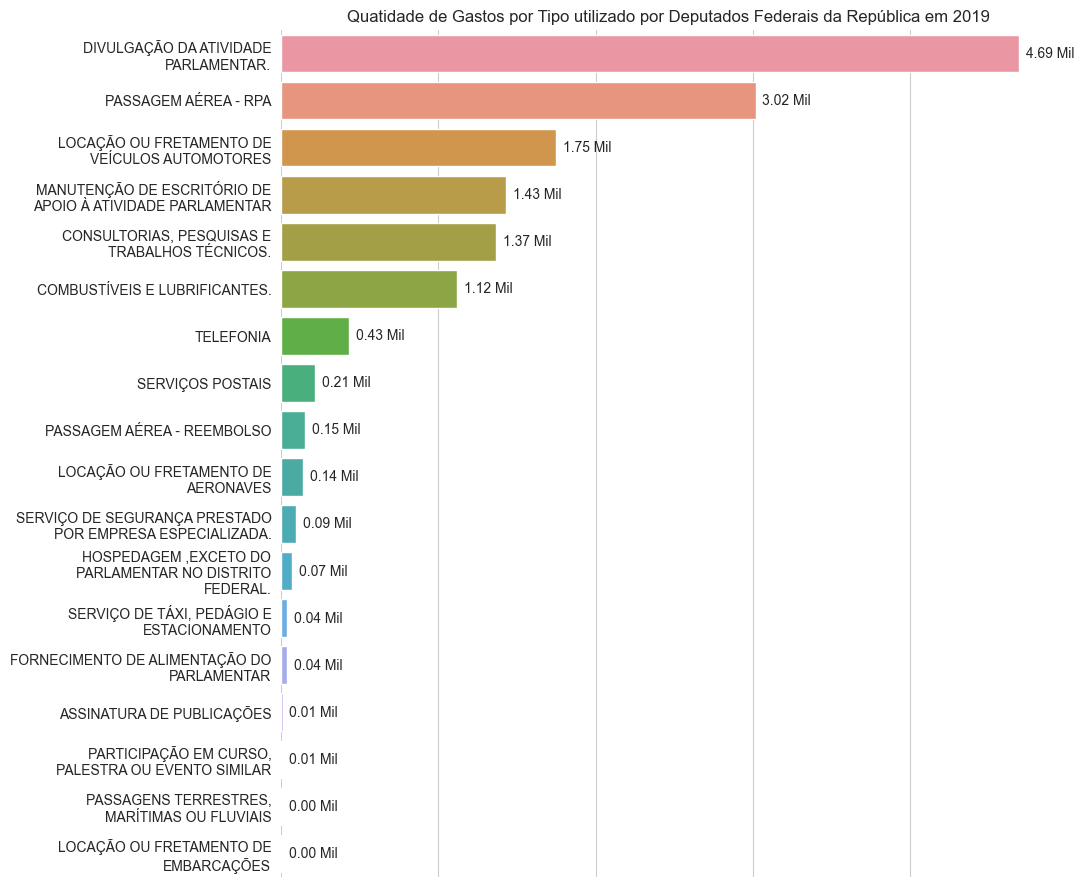

In [253]:
lista_gastos['vlrLiquido'] = lista_gastos.vlrLiquido * 0.000001

lista_gastos['txtDescricao'] = lista_gastos['txtDescricao'].apply(lambda row: '\n'.join(wrap(row, 30)))

plt.figure(figsize=(10,11))
ax = sns.barplot(data=lista_gastos, x="vlrLiquido", y="txtDescricao");
ax.set(xlabel=None, ylabel=None)
ax.set(xticklabels=[])  
ax.bar_label(ax.containers[0], fmt='{:.2f} Mil', padding= 5)
ax.set(title='Quatidade de Gastos por Tipo utilizado por Deputados Federais da República em 2019');
sns.despine(left=True, bottom=True)

In [254]:
df_gastos_concentrados = df_gastos[['txNomeParlamentar', 'cpf', 'vlrLiquido']]

In [255]:
#nova planilha para somar os valores
df_gastos_concentrados

,txNomeParlamentar,cpf,vlrLiquido
905,SILVIO COSTA,1.048139e+10,5990.37
906,SILVIO COSTA,1.048139e+10,22000.00
907,SILVIO COSTA,1.048139e+10,5500.00
908,SILVIO COSTA,1.048139e+10,0.61
909,SILVIO COSTA,1.048139e+10,305.59
...,...,...,...
284566,CARLA STEPHANINI,3.225023e+10,759.57
284567,CARLA STEPHANINI,3.225023e+10,573.57
284568,CARLA STEPHANINI,3.225023e+10,578.49
284569,CARLA STEPHANINI,3.225023e+10,704.39


In [256]:
novo_dfg = df_gastos_concentrados.groupby('cpf')['vlrLiquido'].sum().reset_index()

In [257]:
novo_dfn = df_gastos_concentrados.groupby('cpf')['txNomeParlamentar'].apply(list).reset_index(name='txNomeParlamentar')



In [258]:
novo_dfg

,cpf,vlrLiquido
0,1.608657e+06,15283.65
1,7.487738e+06,32712.49
2,3.122654e+07,31595.90
3,1.054574e+08,37788.63
4,1.387543e+08,40311.24
...,...,...
514,9.816664e+10,33094.65
515,9.830365e+10,2197.39
516,9.876723e+10,22543.78
517,9.931655e+10,17676.10


In [259]:
novo_dfn

,cpf,txNomeParlamentar
0,1.608657e+06,"[Stefano Aguiar, Stefano Aguiar, Stefano Ag..."
1,7.487738e+06,"[Altineu Côrtes, Altineu Côrtes, Altineu Cô..."
2,3.122654e+07,"[Mário Negromonte Jr., Mário Negromonte Jr.,..."
3,1.054574e+08,"[JARBAS VASCONCELOS, JARBAS VASCONCELOS, JAR..."
4,1.387543e+08,"[JOSÉ REINALDO, JOSÉ REINALDO]"
...,...,...
514,9.816664e+10,"[DANIEL VILELA, DANIEL VILELA, DANIEL VILEL..."
515,9.830365e+10,"[Fábio Trad, Fábio Trad, Fábio Trad, Fábio ..."
516,9.876723e+10,"[GIVALDO VIEIRA, GIVALDO VIEIRA, GIVALDO VI..."
517,9.931655e+10,"[Diego Andrade, Diego Andrade, Diego Andrad..."


**O** resultado aqui foi o aparecimento de diversos nomes com o mesmo cpf, então será preciso `normalizar os nomes`.

In [260]:
nomes = pd.DataFrame(df_gastos_concentrados['txNomeParlamentar'])

In [261]:
nomes['nome_parlamentar'] = nomes['txNomeParlamentar'].apply(normalizar_nome)

In [262]:
nomes

,txNomeParlamentar,nome_parlamentar
905,SILVIO COSTA,SILVIO COSTA
906,SILVIO COSTA,SILVIO COSTA
907,SILVIO COSTA,SILVIO COSTA
908,SILVIO COSTA,SILVIO COSTA
909,SILVIO COSTA,SILVIO COSTA
...,...,...
284566,CARLA STEPHANINI,CARLA STEPHANINI
284567,CARLA STEPHANINI,CARLA STEPHANINI
284568,CARLA STEPHANINI,CARLA STEPHANINI
284569,CARLA STEPHANINI,CARLA STEPHANINI


In [263]:
nomes = nomes.groupby('nome_parlamentar')['txNomeParlamentar'].apply(list).reset_index(name='nome_parlamentares')

In [264]:
nomes

,nome_parlamentar,nome_parlamentares
0,ABEL MESQUITA JR.,"[ABEL MESQUITA JR., ABEL MESQUITA JR., ABEL ..."
1,ADAIL CARNEIRO,"[ADAIL CARNEIRO, ADAIL CARNEIRO, ADAIL CARN..."
2,ADALBERTO CAVALCANTI,"[ADALBERTO CAVALCANTI, ADALBERTO CAVALCANTI,..."
3,ADELMO CARNEIRO LEÃO,"[ADELMO CARNEIRO LEÃO, ADELMO CARNEIRO LEÃO, A..."
4,ADELSON BARRETO,"[ADELSON BARRETO, ADELSON BARRETO, ADELSON ..."
...,...,...
514,Zé Carlos,"[Zé Carlos, Zé Carlos, Zé Carlos, Zé Carlo..."
515,Zé Silva,"[Zé Silva, Zé Silva, Zé Silva, Zé Silva, Z..."
516,Zé Augusto Nalin,"[Zé Augusto Nalin, Zé Augusto Nalin, Zé August..."
517,Átila Lins,"[Átila Lins, Átila Lins, Átila Lins, Átila ..."


In [265]:
df3 = pd.concat([nomes, novo_dfg], axis=1)

In [266]:
df3

,nome_parlamentar,nome_parlamentares,cpf,vlrLiquido
0,ABEL MESQUITA JR.,"[ABEL MESQUITA JR., ABEL MESQUITA JR., ABEL ...",1.608657e+06,15283.65
1,ADAIL CARNEIRO,"[ADAIL CARNEIRO, ADAIL CARNEIRO, ADAIL CARN...",7.487738e+06,32712.49
2,ADALBERTO CAVALCANTI,"[ADALBERTO CAVALCANTI, ADALBERTO CAVALCANTI,...",3.122654e+07,31595.90
3,ADELMO CARNEIRO LEÃO,"[ADELMO CARNEIRO LEÃO, ADELMO CARNEIRO LEÃO, A...",1.054574e+08,37788.63
4,ADELSON BARRETO,"[ADELSON BARRETO, ADELSON BARRETO, ADELSON ...",1.387543e+08,40311.24
...,...,...,...,...
514,Zé Carlos,"[Zé Carlos, Zé Carlos, Zé Carlos, Zé Carlo...",9.816664e+10,33094.65
515,Zé Silva,"[Zé Silva, Zé Silva, Zé Silva, Zé Silva, Z...",9.830365e+10,2197.39
516,Zé Augusto Nalin,"[Zé Augusto Nalin, Zé Augusto Nalin, Zé August...",9.876723e+10,22543.78
517,Átila Lins,"[Átila Lins, Átila Lins, Átila Lins, Átila ...",9.931655e+10,17676.10


In [267]:
df3 = df3.drop('nome_parlamentares', axis=1)

In [268]:
df3

,nome_parlamentar,cpf,vlrLiquido
0,ABEL MESQUITA JR.,1.608657e+06,15283.65
1,ADAIL CARNEIRO,7.487738e+06,32712.49
2,ADALBERTO CAVALCANTI,3.122654e+07,31595.90
3,ADELMO CARNEIRO LEÃO,1.054574e+08,37788.63
4,ADELSON BARRETO,1.387543e+08,40311.24
...,...,...,...
514,Zé Carlos,9.816664e+10,33094.65
515,Zé Silva,9.830365e+10,2197.39
516,Zé Augusto Nalin,9.876723e+10,22543.78
517,Átila Lins,9.931655e+10,17676.10


## Segundo arquivo
**proposiçoes de temas**

In [269]:
#Leitura do arquivo
pt = pd.read_excel('proposicoesAutores-2019.xlsx')

C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [270]:
#Contagem de nulos
pt.isna().sum()

idProposicao             0
uriProposicao            0
idDeputadoAutor       5681
uriAutor               337
codTipoAutor             0
tipoAutor                0
nomeAutor                0
siglaPartidoAutor     5206
uriPartidoAutor      13513
siglaUFAutor          5206
ordemAssinatura          0
proponente               0
dtype: int64

In [271]:
pt.isna().sum() * 100/len(pt)

idProposicao          0.000000
uriProposicao         0.000000
idDeputadoAutor       4.448185
uriAutor              0.263869
codTipoAutor          0.000000
tipoAutor             0.000000
nomeAutor             0.000000
siglaPartidoAutor     4.076264
uriPartidoAutor      10.580590
siglaUFAutor          4.076264
ordemAssinatura       0.000000
proponente            0.000000
dtype: float64

Apesar da coluna idDeputadoAutor ter uma boa quantidade de linhas nulas, essas realmente não ajudarão, por isso é necessário fazer a retirada 

In [272]:
#primeiro corte
pt = pt.dropna(subset=['idDeputadoAutor', 'siglaPartidoAutor'])

In [273]:
pt

,idProposicao,uriProposicao,idDeputadoAutor,uriAutor,codTipoAutor,tipoAutor,nomeAutor,siglaPartidoAutor,uriPartidoAutor,siglaUFAutor,ordemAssinatura,proponente
25,2343468,https://dadosabertos.camara.leg.br/api/v2/prop...,204457.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Juninho do Pneu,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,1,1
28,2338915,https://dadosabertos.camara.leg.br/api/v2/prop...,204572.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Capitão Alberto Neto,PL,https://dadosabertos.camara.leg.br/api/v2/part...,AM,1,1
29,2338667,https://dadosabertos.camara.leg.br/api/v2/prop...,178916.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Daniel Coelho,CIDADANIA,https://dadosabertos.camara.leg.br/api/v2/part...,PE,1,1
35,2330989,https://dadosabertos.camara.leg.br/api/v2/prop...,141398.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Carlos Zarattini,PT,https://dadosabertos.camara.leg.br/api/v2/part...,SP,1,1
105,2297229,https://dadosabertos.camara.leg.br/api/v2/prop...,160532.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Eli Corrêa Filho,DEM,https://dadosabertos.camara.leg.br/api/v2/part...,SP,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
127709,530357,https://dadosabertos.camara.leg.br/api/v2/prop...,160534.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Lauriete,PSC,https://dadosabertos.camara.leg.br/api/v2/part...,ES,1,1
127710,512431,https://dadosabertos.camara.leg.br/api/v2/prop...,160575.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Erika Kokay,PT,https://dadosabertos.camara.leg.br/api/v2/part...,DF,1,1
127711,501638,https://dadosabertos.camara.leg.br/api/v2/prop...,141472.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Ricardo Tripoli,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,SP,1,1
127712,427339,https://dadosabertos.camara.leg.br/api/v2/prop...,141401.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Carlos Bezerra,PMDB,https://dadosabertos.camara.leg.br/api/v2/part...,MT,1,1


O segundo corte está sendo feito segundo as informações mais diretas a serem buscadas: A proposição e seu link de busca; o codigo do parlamentar e seu nome; o partido ao qual está vinculado e sua origem(seu estado)


In [274]:
#Segundo corte
pt = pt.drop(['uriAutor', 'codTipoAutor', 'tipoAutor', 'uriPartidoAutor', 'ordemAssinatura', 'proponente'], axis=1)

In [275]:
pt

,idProposicao,uriProposicao,idDeputadoAutor,nomeAutor,siglaPartidoAutor,siglaUFAutor
25,2343468,https://dadosabertos.camara.leg.br/api/v2/prop...,204457.0,Juninho do Pneu,UNIÃO,RJ
28,2338915,https://dadosabertos.camara.leg.br/api/v2/prop...,204572.0,Capitão Alberto Neto,PL,AM
29,2338667,https://dadosabertos.camara.leg.br/api/v2/prop...,178916.0,Daniel Coelho,CIDADANIA,PE
35,2330989,https://dadosabertos.camara.leg.br/api/v2/prop...,141398.0,Carlos Zarattini,PT,SP
105,2297229,https://dadosabertos.camara.leg.br/api/v2/prop...,160532.0,Eli Corrêa Filho,DEM,SP
...,...,...,...,...,...,...
127709,530357,https://dadosabertos.camara.leg.br/api/v2/prop...,160534.0,Lauriete,PSC,ES
127710,512431,https://dadosabertos.camara.leg.br/api/v2/prop...,160575.0,Erika Kokay,PT,DF
127711,501638,https://dadosabertos.camara.leg.br/api/v2/prop...,141472.0,Ricardo Tripoli,PSDB,SP
127712,427339,https://dadosabertos.camara.leg.br/api/v2/prop...,141401.0,Carlos Bezerra,PMDB,MT


In [276]:
#normalização dos nomes
pt['nomeAutor'] = pt['nomeAutor'].apply(normalizar_nome)

In [277]:
pt

,idProposicao,uriProposicao,idDeputadoAutor,nomeAutor,siglaPartidoAutor,siglaUFAutor
25,2343468,https://dadosabertos.camara.leg.br/api/v2/prop...,204457.0,Juninho do Pneu,UNIÃO,RJ
28,2338915,https://dadosabertos.camara.leg.br/api/v2/prop...,204572.0,Capitão Alberto Neto,PL,AM
29,2338667,https://dadosabertos.camara.leg.br/api/v2/prop...,178916.0,Daniel Coelho,CIDADANIA,PE
35,2330989,https://dadosabertos.camara.leg.br/api/v2/prop...,141398.0,Carlos Zarattini,PT,SP
105,2297229,https://dadosabertos.camara.leg.br/api/v2/prop...,160532.0,Eli Corrêa Filho,DEM,SP
...,...,...,...,...,...,...
127709,530357,https://dadosabertos.camara.leg.br/api/v2/prop...,160534.0,Lauriete,PSC,ES
127710,512431,https://dadosabertos.camara.leg.br/api/v2/prop...,160575.0,Erika Kokay,PT,DF
127711,501638,https://dadosabertos.camara.leg.br/api/v2/prop...,141472.0,Ricardo Tripoli,PSDB,SP
127712,427339,https://dadosabertos.camara.leg.br/api/v2/prop...,141401.0,Carlos Bezerra,PMDB,MT


In [278]:
#Contagem de quantas propostas foram feitas
count = pt.groupby('nomeAutor').size()

In [279]:
count

nomeAutor
AJ  Albuquerque      73
Abelardo  Lupion      1
Abou  Anni          263
Abílio  Santana     273
Acácio  Favacho     107
                   ... 
Zé  Vitor           305
Álvaro  Dias          1
Átila  Lins         160
Átila  Lira         370
Áurea  Carolina     360
Length: 634, dtype: int64

In [280]:
# Criar um novo DataFrame com o resultado da contagem
pt_counts = pd.DataFrame({'nomeAutor': count.index, 'contagem': count.values})

# Exibir o novo DataFrame
print(pt_counts)


            nomeAutor  contagem
0     AJ  Albuquerque        73
1    Abelardo  Lupion         1
2          Abou  Anni       263
3     Abílio  Santana       273
4     Acácio  Favacho       107
..                ...       ...
629         Zé  Vitor       305
630      Álvaro  Dias         1
631       Átila  Lins       160
632       Átila  Lira       370
633   Áurea  Carolina       360

[634 rows x 2 columns]


In [281]:
pt_counts['nomeAutor'] = pt_counts['nomeAutor'].apply(normalizar_nome)


In [282]:
pt_counts

,nomeAutor,contagem
0,AJ Albuquerque,73
1,Abelardo Lupion,1
2,Abou Anni,263
3,Abílio Santana,273
4,Acácio Favacho,107
...,...,...
629,Zé Vitor,305
630,Álvaro Dias,1
631,Átila Lins,160
632,Átila Lira,370


In [283]:
pt_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nomeAutor  634 non-null    object
 1   contagem   634 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [284]:
nomes_proposta = df3[df3['nome_parlamentar'].isin(pt_counts['nomeAutor'])]
print(nomes_proposta)


       nome_parlamentar           cpf  vlrLiquido
27     Afonso  Florence  1.009321e+09    25269.47
28         Afonso  Hamm  1.055737e+09    40937.56
29        Afonso  Motta  1.102125e+09    47521.69
30   Aguinaldo  Ribeiro  1.117690e+09    34382.16
31           Alan  Rick  1.171688e+09    42543.82
..                  ...           ...         ...
512        Zeca  Dirceu  9.647685e+10    27348.61
514          Zé  Carlos  9.816664e+10    33094.65
515           Zé  Silva  9.830365e+10     2197.39
517         Átila  Lins  9.931655e+10    17676.10
518         Átila  Lira  9.989866e+10    36743.09

[260 rows x 3 columns]


In [285]:
df4 = pd.DataFrame(nomes_proposta)

In [286]:
df4

,nome_parlamentar,cpf,vlrLiquido
27,Afonso Florence,1.009321e+09,25269.47
28,Afonso Hamm,1.055737e+09,40937.56
29,Afonso Motta,1.102125e+09,47521.69
30,Aguinaldo Ribeiro,1.117690e+09,34382.16
31,Alan Rick,1.171688e+09,42543.82
...,...,...,...
512,Zeca Dirceu,9.647685e+10,27348.61
514,Zé Carlos,9.816664e+10,33094.65
515,Zé Silva,9.830365e+10,2197.39
517,Átila Lins,9.931655e+10,17676.10


In [287]:
#reordenando para colocar do maior para o menor
df4_decrescente = df4.sort_values(by='vlrLiquido', ascending=False)


In [288]:
df4_decrescente

,nome_parlamentar,cpf,vlrLiquido
203,Heitor Schuch,1.534593e+10,72280.85
386,Paulo Abi-Ackel,4.814060e+10,68736.60
351,Miguel Lombardi,4.007057e+10,59640.35
181,Félix Mendonça Júnior,1.237739e+10,58132.04
96,Carlos Henrique Gaguim,4.789114e+09,56138.72
...,...,...,...
95,Carlos Zarattini,4.707961e+09,625.21
129,Dimas Fabiano,7.078571e+09,99.86
91,Capitão Fábio Abreu,4.524797e+09,80.34
303,Luiz Nishimori,3.079059e+10,2.53


In [289]:
#renomeando para unir os df's mais tarde
pt_counts.rename(columns={'nomeAutor': 'nome_parlamentar'}, inplace=True)

In [290]:
pt_counts

,nome_parlamentar,contagem
0,AJ Albuquerque,73
1,Abelardo Lupion,1
2,Abou Anni,263
3,Abílio Santana,273
4,Acácio Favacho,107
...,...,...
629,Zé Vitor,305
630,Álvaro Dias,1
631,Átila Lins,160
632,Átila Lira,370


In [291]:
#união dos df's
df_merged = pd.merge(pt_counts, df4_decrescente, on='nome_parlamentar')

In [292]:
df_merged

,nome_parlamentar,contagem,cpf,vlrLiquido
0,Afonso Florence,341,1.009321e+09,25269.47
1,Afonso Hamm,153,1.055737e+09,40937.56
2,Afonso Motta,315,1.102125e+09,47521.69
3,Aguinaldo Ribeiro,119,1.117690e+09,34382.16
4,Alan Rick,195,1.171688e+09,42543.82
...,...,...,...,...
255,Zeca Dirceu,334,9.647685e+10,27348.61
256,Zé Carlos,211,9.816664e+10,33094.65
257,Zé Silva,314,9.830365e+10,2197.39
258,Átila Lins,160,9.931655e+10,17676.10


In [293]:
#renomeando as colunas para melhor entendimento
df_doc12 = df_merged.rename(columns={"contagem": "quant_proposta", "vlrLiquido": "gastos"})


In [294]:
df_doc12

,nome_parlamentar,quant_proposta,cpf,gastos
0,Afonso Florence,341,1.009321e+09,25269.47
1,Afonso Hamm,153,1.055737e+09,40937.56
2,Afonso Motta,315,1.102125e+09,47521.69
3,Aguinaldo Ribeiro,119,1.117690e+09,34382.16
4,Alan Rick,195,1.171688e+09,42543.82
...,...,...,...,...
255,Zeca Dirceu,334,9.647685e+10,27348.61
256,Zé Carlos,211,9.816664e+10,33094.65
257,Zé Silva,314,9.830365e+10,2197.39
258,Átila Lins,160,9.931655e+10,17676.10


## Terceiro documento

In [295]:
df_3 = pd.read_csv('proposicoesTemas-2019.csv', sep=';')

In [296]:
df_3

,uriProposicao,siglaTipo,numero,ano,codTema,tema,relevancia
0,https://dadosabertos.camara.leg.br/api/v2/prop...,EMS,3820,2019,64,"Agricultura, Pecuária, Pesca e Extrativismo",0
1,https://dadosabertos.camara.leg.br/api/v2/prop...,EMS,3820,2019,58,Trabalho e Emprego,0
2,https://dadosabertos.camara.leg.br/api/v2/prop...,MSC,410,2019,34,Administração Pública,0
3,https://dadosabertos.camara.leg.br/api/v2/prop...,MSC,418,2019,34,Administração Pública,0
4,https://dadosabertos.camara.leg.br/api/v2/prop...,EMS,4805,2019,62,"Ciência, Tecnologia e Inovação",0
...,...,...,...,...,...,...,...
15077,https://dadosabertos.camara.leg.br/api/v2/prop...,PLV,30,2019,70,Finanças Públicas e Orçamento,0
15078,https://dadosabertos.camara.leg.br/api/v2/prop...,PLV,31,2019,51,Estrutura Fundiária,0
15079,https://dadosabertos.camara.leg.br/api/v2/prop...,PLV,31,2019,48,Meio Ambiente e Desenvolvimento Sustentável,0
15080,https://dadosabertos.camara.leg.br/api/v2/prop...,REQ,1,2019,35,"Arte, Cultura e Religião",0


Nesse documento temos os temas propostos e a unica coluna com semelhança das outras trabalhadas é a 'uriProposicao', que foi trabalhada no DataFrame pt.

Por isso vamos tentar fazer uma união


In [297]:
df_m = pd.merge(pt, df_3, on='uriProposicao')

In [298]:
df_m

,idProposicao,uriProposicao,idDeputadoAutor,nomeAutor,siglaPartidoAutor,siglaUFAutor,siglaTipo,numero,ano,codTema,tema,relevancia
0,2236183,https://dadosabertos.camara.leg.br/api/v2/prop...,160512.0,Aureo Ribeiro,SOLIDARI,RJ,PFC,54,2019,34,Administração Pública,0
1,2236183,https://dadosabertos.camara.leg.br/api/v2/prop...,160512.0,Aureo Ribeiro,SOLIDARI,RJ,PFC,54,2019,66,"Indústria, Comércio e Serviços",0
2,2236183,https://dadosabertos.camara.leg.br/api/v2/prop...,160512.0,Aureo Ribeiro,SOLIDARI,RJ,PFC,54,2019,53,Processo Legislativo e Atuação Parlamentar,0
3,2236181,https://dadosabertos.camara.leg.br/api/v2/prop...,73943.0,Perpétua Almeida,PCdoB,AC,RIC,1880,2019,44,Direitos Humanos e Minorias,0
4,2236181,https://dadosabertos.camara.leg.br/api/v2/prop...,73943.0,Perpétua Almeida,PCdoB,AC,RIC,1880,2019,40,Economia,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18084,530357,https://dadosabertos.camara.leg.br/api/v2/prop...,160534.0,Lauriete,PSC,ES,PL,2440,2019,67,Direito e Defesa do Consumidor,0
18085,512431,https://dadosabertos.camara.leg.br/api/v2/prop...,160575.0,Erika Kokay,PT,DF,PL,2442,2019,37,Comunicações,0
18086,501638,https://dadosabertos.camara.leg.br/api/v2/prop...,141472.0,Ricardo Tripoli,PSDB,SP,PL,402,2019,44,Direitos Humanos e Minorias,0
18087,427339,https://dadosabertos.camara.leg.br/api/v2/prop...,141401.0,Carlos Bezerra,PMDB,MT,PL,2439,2019,66,"Indústria, Comércio e Serviços",0


In [299]:
#eliminação de algumas colunas que dificultam o trabalho daqui para frente, considerando a construção até agora
dfm = df_m.drop(['idDeputadoAutor', 'siglaPartidoAutor', 'siglaUFAutor', 'siglaTipo', 'numero', 'ano', 'relevancia'], axis=1)

In [300]:
dfm

,idProposicao,uriProposicao,nomeAutor,codTema,tema
0,2236183,https://dadosabertos.camara.leg.br/api/v2/prop...,Aureo Ribeiro,34,Administração Pública
1,2236183,https://dadosabertos.camara.leg.br/api/v2/prop...,Aureo Ribeiro,66,"Indústria, Comércio e Serviços"
2,2236183,https://dadosabertos.camara.leg.br/api/v2/prop...,Aureo Ribeiro,53,Processo Legislativo e Atuação Parlamentar
3,2236181,https://dadosabertos.camara.leg.br/api/v2/prop...,Perpétua Almeida,44,Direitos Humanos e Minorias
4,2236181,https://dadosabertos.camara.leg.br/api/v2/prop...,Perpétua Almeida,40,Economia
...,...,...,...,...,...
18084,530357,https://dadosabertos.camara.leg.br/api/v2/prop...,Lauriete,67,Direito e Defesa do Consumidor
18085,512431,https://dadosabertos.camara.leg.br/api/v2/prop...,Erika Kokay,37,Comunicações
18086,501638,https://dadosabertos.camara.leg.br/api/v2/prop...,Ricardo Tripoli,44,Direitos Humanos e Minorias
18087,427339,https://dadosabertos.camara.leg.br/api/v2/prop...,Carlos Bezerra,66,"Indústria, Comércio e Serviços"


In [301]:
#tabela de pesquisa
df_correspondente = dfm[['codTema', 'tema']]

In [302]:
#duas formas de fazer essa união
#dfm.groupby('nomeAutor')['codTema]'.unique()
dfm.groupby('nomeAutor')['tema'].unique()


nomeAutor
AJ  Albuquerque     [Finanças Públicas e Orçamento, Educação, Ener...
Abelardo  Lupion    [Agricultura, Pecuária, Pesca e Extrativismo, ...
Abou  Anni          [Trabalho e Emprego, Viação, Transporte e Mobi...
Abílio  Santana     [Direito Civil e Processual Civil, Homenagens ...
Acácio  Favacho     [Finanças Públicas e Orçamento, Viação, Transp...
                                          ...                        
Zé  Silva           [Homenagens e Datas Comemorativas, Viação, Tra...
Zé  Vitor           [Educação, Defesa e Segurança, Direitos Humano...
Átila  Lins         [Educação, Viação, Transporte e Mobilidade, Fi...
Átila  Lira         [Educação, Saúde, Política, Partidos e Eleiçõe...
Áurea  Carolina     [Homenagens e Datas Comemorativas, Saúde, Admi...
Name: tema, Length: 558, dtype: object

In [303]:
#Transformar a união em df
dftemas = dfm.groupby('nomeAutor')['tema'].unique().apply(list).reset_index(name='temas')

In [304]:
#filtrar pelo ultimo df feito da união dos arquivos anteriores
proposta_tema= dftemas[dftemas['nomeAutor'].isin(df_doc12['nome_parlamentar'])]
print(proposta_tema)

              nomeAutor                                              temas
8      Afonso  Florence  [Trabalho e Emprego, Viação, Transporte e Mobi...
9          Afonso  Hamm  [Finanças Públicas e Orçamento, Saúde, Direito...
10        Afonso  Motta  [Direito Penal e Processual Penal, Viação, Tra...
11   Aguinaldo  Ribeiro  [Direitos Humanos e Minorias, Educação, Previd...
14           Alan  Rick  [Educação, Saúde, Direitos Humanos e Minorias,...
..                  ...                                                ...
550        Zeca  Dirceu  [Trabalho e Emprego, Viação, Transporte e Mobi...
551          Zé  Carlos  [Trabalho e Emprego, Viação, Transporte e Mobi...
553           Zé  Silva  [Homenagens e Datas Comemorativas, Viação, Tra...
555         Átila  Lins  [Educação, Viação, Transporte e Mobilidade, Fi...
556         Átila  Lira  [Educação, Saúde, Política, Partidos e Eleiçõe...

[243 rows x 2 columns]


In [305]:
#DF com filtro de busca
proposta_tema = pd.DataFrame(proposta_tema)

In [306]:
proposta_tema

,nomeAutor,temas
8,Afonso Florence,"[Trabalho e Emprego, Viação, Transporte e Mobi..."
9,Afonso Hamm,"[Finanças Públicas e Orçamento, Saúde, Direito..."
10,Afonso Motta,"[Direito Penal e Processual Penal, Viação, Tra..."
11,Aguinaldo Ribeiro,"[Direitos Humanos e Minorias, Educação, Previd..."
14,Alan Rick,"[Educação, Saúde, Direitos Humanos e Minorias,..."
...,...,...
550,Zeca Dirceu,"[Trabalho e Emprego, Viação, Transporte e Mobi..."
551,Zé Carlos,"[Trabalho e Emprego, Viação, Transporte e Mobi..."
553,Zé Silva,"[Homenagens e Datas Comemorativas, Viação, Tra..."
555,Átila Lins,"[Educação, Viação, Transporte e Mobilidade, Fi..."


In [307]:
df_doc3 = proposta_tema.rename(columns={"nomeAutor": "nome_parlamentar"})

In [308]:
df_doc3

,nome_parlamentar,temas
8,Afonso Florence,"[Trabalho e Emprego, Viação, Transporte e Mobi..."
9,Afonso Hamm,"[Finanças Públicas e Orçamento, Saúde, Direito..."
10,Afonso Motta,"[Direito Penal e Processual Penal, Viação, Tra..."
11,Aguinaldo Ribeiro,"[Direitos Humanos e Minorias, Educação, Previd..."
14,Alan Rick,"[Educação, Saúde, Direitos Humanos e Minorias,..."
...,...,...
550,Zeca Dirceu,"[Trabalho e Emprego, Viação, Transporte e Mobi..."
551,Zé Carlos,"[Trabalho e Emprego, Viação, Transporte e Mobi..."
553,Zé Silva,"[Homenagens e Datas Comemorativas, Viação, Tra..."
555,Átila Lins,"[Educação, Viação, Transporte e Mobilidade, Fi..."


In [309]:
dff = pd.merge(df_doc3,df_merged[['nome_parlamentar', 'contagem', 'cpf', 'vlrLiquido']], how='left', on='nome_parlamentar')

In [310]:
dff

,nome_parlamentar,temas,contagem,cpf,vlrLiquido
0,Afonso Florence,"[Trabalho e Emprego, Viação, Transporte e Mobi...",341,1.009321e+09,25269.47
1,Afonso Hamm,"[Finanças Públicas e Orçamento, Saúde, Direito...",153,1.055737e+09,40937.56
2,Afonso Motta,"[Direito Penal e Processual Penal, Viação, Tra...",315,1.102125e+09,47521.69
3,Aguinaldo Ribeiro,"[Direitos Humanos e Minorias, Educação, Previd...",119,1.117690e+09,34382.16
4,Alan Rick,"[Educação, Saúde, Direitos Humanos e Minorias,...",195,1.171688e+09,42543.82
...,...,...,...,...,...
238,Zeca Dirceu,"[Trabalho e Emprego, Viação, Transporte e Mobi...",334,9.647685e+10,27348.61
239,Zé Carlos,"[Trabalho e Emprego, Viação, Transporte e Mobi...",211,9.816664e+10,33094.65
240,Zé Silva,"[Homenagens e Datas Comemorativas, Viação, Tra...",314,9.830365e+10,2197.39
241,Átila Lins,"[Educação, Viação, Transporte e Mobilidade, Fi...",160,9.931655e+10,17676.10


In [311]:
dff = dff.reindex(columns=['nome_parlamentar', 'cpf', 'vlrLiquido', 'contagem', 'temas'])

## Quarto documento

In [312]:
evento = pd.read_excel('eventosPresencaDeputados-2019.xlsx')

C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [313]:
evento

,idEvento,uriEvento,dataHoraInicio,idDeputado,uriDeputado
0,53928,https://dadosabertos.camara.leg.br/api/v2/even...,2019-03-20T10:21:33,66179,https://dadosabertos.camara.leg.br/api/v2/depu...
1,53928,https://dadosabertos.camara.leg.br/api/v2/even...,2019-03-20T10:21:33,73460,https://dadosabertos.camara.leg.br/api/v2/depu...
2,53928,https://dadosabertos.camara.leg.br/api/v2/even...,2019-03-20T10:21:33,121948,https://dadosabertos.camara.leg.br/api/v2/depu...
3,53928,https://dadosabertos.camara.leg.br/api/v2/even...,2019-03-20T10:21:33,134812,https://dadosabertos.camara.leg.br/api/v2/depu...
4,53928,https://dadosabertos.camara.leg.br/api/v2/even...,2019-03-20T10:21:33,160508,https://dadosabertos.camara.leg.br/api/v2/depu...
...,...,...,...,...,...
152009,59226,https://dadosabertos.camara.leg.br/api/v2/even...,2019-12-18T16:31:00,204542,https://dadosabertos.camara.leg.br/api/v2/depu...
152010,59226,https://dadosabertos.camara.leg.br/api/v2/even...,2019-12-18T16:31:00,204575,https://dadosabertos.camara.leg.br/api/v2/depu...
152011,59235,https://dadosabertos.camara.leg.br/api/v2/even...,2019-11-04T09:00:00,73696,https://dadosabertos.camara.leg.br/api/v2/depu...
152012,59240,https://dadosabertos.camara.leg.br/api/v2/even...,2019-07-03T14:00:00,74079,https://dadosabertos.camara.leg.br/api/v2/depu...


In [314]:
evento['contagem'] = 1

In [315]:
evento

,idEvento,uriEvento,dataHoraInicio,idDeputado,uriDeputado,contagem
0,53928,https://dadosabertos.camara.leg.br/api/v2/even...,2019-03-20T10:21:33,66179,https://dadosabertos.camara.leg.br/api/v2/depu...,1
1,53928,https://dadosabertos.camara.leg.br/api/v2/even...,2019-03-20T10:21:33,73460,https://dadosabertos.camara.leg.br/api/v2/depu...,1
2,53928,https://dadosabertos.camara.leg.br/api/v2/even...,2019-03-20T10:21:33,121948,https://dadosabertos.camara.leg.br/api/v2/depu...,1
3,53928,https://dadosabertos.camara.leg.br/api/v2/even...,2019-03-20T10:21:33,134812,https://dadosabertos.camara.leg.br/api/v2/depu...,1
4,53928,https://dadosabertos.camara.leg.br/api/v2/even...,2019-03-20T10:21:33,160508,https://dadosabertos.camara.leg.br/api/v2/depu...,1
...,...,...,...,...,...,...
152009,59226,https://dadosabertos.camara.leg.br/api/v2/even...,2019-12-18T16:31:00,204542,https://dadosabertos.camara.leg.br/api/v2/depu...,1
152010,59226,https://dadosabertos.camara.leg.br/api/v2/even...,2019-12-18T16:31:00,204575,https://dadosabertos.camara.leg.br/api/v2/depu...,1
152011,59235,https://dadosabertos.camara.leg.br/api/v2/even...,2019-11-04T09:00:00,73696,https://dadosabertos.camara.leg.br/api/v2/depu...,1
152012,59240,https://dadosabertos.camara.leg.br/api/v2/even...,2019-07-03T14:00:00,74079,https://dadosabertos.camara.leg.br/api/v2/depu...,1


In [316]:
eventos = evento.groupby('idDeputado')['contagem'].sum()

In [317]:
eventos

idDeputado
66179     283
66828     190
67138     139
68720     413
69871     223
         ... 
209189    222
211649     75
211866    100
212504     26
212625     12
Name: contagem, Length: 543, dtype: int64

In [318]:
df_result = pd.DataFrame()

In [319]:
df_result = df_result.assign(soma=eventos)

In [320]:
df_result

,soma
idDeputado,
66179,283
66828,190
67138,139
68720,413
69871,223
...,...
209189,222
211649,75
211866,100


In [321]:
df_result = df_result.reset_index()


In [322]:
df_result

,idDeputado,soma
0,66179,283
1,66828,190
2,67138,139
3,68720,413
4,69871,223
...,...,...
538,209189,222
539,211649,75
540,211866,100
541,212504,26


In [323]:
df_result

,idDeputado,soma
0,66179,283
1,66828,190
2,67138,139
3,68720,413
4,69871,223
...,...,...
538,209189,222
539,211649,75
540,211866,100
541,212504,26


In [324]:
df_result = df_result.rename(columns={"idDeputado": "idDeputadoAutor"})

In [325]:
df_eventos= pd.merge(pt, df_result, on='idDeputadoAutor')

In [326]:
df_eventos

,idProposicao,uriProposicao,idDeputadoAutor,nomeAutor,siglaPartidoAutor,siglaUFAutor,soma
0,2343468,https://dadosabertos.camara.leg.br/api/v2/prop...,204457.0,Juninho do Pneu,UNIÃO,RJ,257
1,2235983,https://dadosabertos.camara.leg.br/api/v2/prop...,204457.0,Juninho do Pneu,DEM,RJ,257
2,2235970,https://dadosabertos.camara.leg.br/api/v2/prop...,204457.0,Juninho do Pneu,DEM,RJ,257
3,2234684,https://dadosabertos.camara.leg.br/api/v2/prop...,204457.0,Juninho do Pneu,DEM,RJ,257
4,2234681,https://dadosabertos.camara.leg.br/api/v2/prop...,204457.0,Juninho do Pneu,DEM,RJ,257
...,...,...,...,...,...,...,...
121190,2193297,https://dadosabertos.camara.leg.br/api/v2/prop...,168175.0,Simplício Araújo,SOLIDARI,MA,5
121191,2193191,https://dadosabertos.camara.leg.br/api/v2/prop...,168175.0,Simplício Araújo,SOLIDARI,MA,5
121192,2193181,https://dadosabertos.camara.leg.br/api/v2/prop...,168175.0,Simplício Araújo,SOLIDARI,MA,5
121193,2193180,https://dadosabertos.camara.leg.br/api/v2/prop...,168175.0,Simplício Araújo,SOLIDARI,MA,5


In [327]:
df_e = df_eventos[['nomeAutor', 'soma']]

In [328]:
df_e

,nomeAutor,soma
0,Juninho do Pneu,257
1,Juninho do Pneu,257
2,Juninho do Pneu,257
3,Juninho do Pneu,257
4,Juninho do Pneu,257
...,...,...
121190,Simplício Araújo,5
121191,Simplício Araújo,5
121192,Simplício Araújo,5
121193,Simplício Araújo,5


In [329]:
df_e = df_e.rename(columns={"nomeAutor": "nome_parlamentar"})

In [330]:
df_e = df_e.drop_duplicates(subset=['nome_parlamentar'])


In [331]:
df_e

,nome_parlamentar,soma
0,Juninho do Pneu,257
176,Capitão Alberto Neto,344
640,Daniel Coelho,212
836,Carlos Zarattini,208
1174,Eli Corrêa Filho,198
...,...,...
121045,Merlong Solano,54
121155,Rubens Pereira Júnior,8
121182,Covatti Filho,3
121185,Simplício Araújo,5


In [332]:
df_final= pd.merge(df_e,dff[['nome_parlamentar', 'cpf', 'vlrLiquido', 'contagem', 'temas']], how='left', on='nome_parlamentar')

In [333]:
df_final

,nome_parlamentar,soma,cpf,vlrLiquido,contagem,temas
0,Juninho do Pneu,257,NaN,NaN,NaN,NaN
1,Capitão Alberto Neto,344,NaN,NaN,NaN,NaN
2,Daniel Coelho,212,6.313475e+09,12074.68,196.0,"[Direitos Humanos e Minorias, Educação, Previd..."
3,Carlos Zarattini,208,4.707961e+09,625.21,338.0,"[Direitos Humanos e Minorias, Energia, Recurso..."
4,Eli Corrêa Filho,198,9.673505e+09,41586.85,108.0,"[Direitos Humanos e Minorias, Saúde, Viação, T..."
...,...,...,...,...,...,...
541,Merlong Solano,54,NaN,NaN,NaN,NaN
542,Rubens Pereira Júnior,8,6.585110e+10,26551.88,27.0,"[Administração Pública, Direitos Humanos e Min..."
543,Covatti Filho,3,5.355526e+09,34608.16,3.0,"[Indústria, Comércio e Serviços, Meio Ambiente..."
544,Simplício Araújo,5,NaN,NaN,NaN,NaN


## Tratamento da base de dados final

In [334]:
df_final = df_final.dropna()

In [335]:
df_final

,nome_parlamentar,soma,cpf,vlrLiquido,contagem,temas
2,Daniel Coelho,212,6.313475e+09,12074.68,196.0,"[Direitos Humanos e Minorias, Educação, Previd..."
3,Carlos Zarattini,208,4.707961e+09,625.21,338.0,"[Direitos Humanos e Minorias, Energia, Recurso..."
4,Eli Corrêa Filho,198,9.673505e+09,41586.85,108.0,"[Direitos Humanos e Minorias, Saúde, Viação, T..."
5,Padre João,360,4.771224e+10,35759.14,384.0,"[Agricultura, Pecuária, Pesca e Extrativismo, ..."
6,Fábio Trad,458,1.235299e+10,34838.15,633.0,"[Economia, Defesa e Segurança, Direitos Humano..."
...,...,...,...,...,...,...
539,Valtenir Pereira,146,8.199336e+10,26364.85,261.0,"[Administração Pública, Viação, Transporte e M..."
540,Rodrigo Maia,161,6.195638e+10,33843.35,2.0,"[Direitos Humanos e Minorias, Finanças Pública..."
542,Rubens Pereira Júnior,8,6.585110e+10,26551.88,27.0,"[Administração Pública, Direitos Humanos e Min..."
543,Covatti Filho,3,5.355526e+09,34608.16,3.0,"[Indústria, Comércio e Serviços, Meio Ambiente..."


In [336]:
df_final = df_final.rename(columns={"nome_parlamentar": "Parlamentar", "soma": "Quant_eventos", "cpf": "CPF", "vlrLiquido": "Gastos", "contagem": "Quant_propostas"}) 

In [337]:
df_final

,Parlamentar,Quant_eventos,CPF,Gastos,Quant_propostas,temas
2,Daniel Coelho,212,6.313475e+09,12074.68,196.0,"[Direitos Humanos e Minorias, Educação, Previd..."
3,Carlos Zarattini,208,4.707961e+09,625.21,338.0,"[Direitos Humanos e Minorias, Energia, Recurso..."
4,Eli Corrêa Filho,198,9.673505e+09,41586.85,108.0,"[Direitos Humanos e Minorias, Saúde, Viação, T..."
5,Padre João,360,4.771224e+10,35759.14,384.0,"[Agricultura, Pecuária, Pesca e Extrativismo, ..."
6,Fábio Trad,458,1.235299e+10,34838.15,633.0,"[Economia, Defesa e Segurança, Direitos Humano..."
...,...,...,...,...,...,...
539,Valtenir Pereira,146,8.199336e+10,26364.85,261.0,"[Administração Pública, Viação, Transporte e M..."
540,Rodrigo Maia,161,6.195638e+10,33843.35,2.0,"[Direitos Humanos e Minorias, Finanças Pública..."
542,Rubens Pereira Júnior,8,6.585110e+10,26551.88,27.0,"[Administração Pública, Direitos Humanos e Min..."
543,Covatti Filho,3,5.355526e+09,34608.16,3.0,"[Indústria, Comércio e Serviços, Meio Ambiente..."


In [338]:
df_final = df_final.reindex(columns=['Parlamentar', 'CPF', 'Gastos', 'Quant_eventos', 'Quant_propostas', 'temas'])

In [339]:
df_gastos = df_gastos.rename(columns={"txNomeParlamentar": "Parlamentar"})

In [340]:
df_final_2= pd.merge(df_gastos,df_final[['Parlamentar', 'CPF', 'Gastos', 'Quant_eventos', 'Quant_propostas', 'temas']], how='left', on='Parlamentar')

In [341]:
df_final_2

,Parlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,txtPassageiro,txtTrecho,numLote,nuDeputadoId,ideDocumento,CPF,Gastos,Quant_eventos,Quant_propostas,temas
0,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,3,COMBUSTÍVEIS E LUBRIFICANTES.,...,NaN,NaN,1555348,1973,6741346,NaN,NaN,NaN,NaN,NaN
1,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,NaN,NaN,1557940,1973,6746499,NaN,NaN,NaN,NaN,NaN
2,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,NaN,NaN,1555349,1973,6741390,NaN,NaN,NaN,NaN,NaN
3,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,10,TELEFONIA,...,NaN,NaN,0,1973,0,NaN,NaN,NaN,NaN,NaN
4,SILVIO COSTA,1.048139e+10,4930.0,160.0,2015,PE,AVANTE,55,10,TELEFONIA,...,NaN,NaN,0,1973,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14076,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,MARZOLA/TARSILA,CGR/BSB,0,3193,1633716,NaN,NaN,NaN,NaN,NaN
14077,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,CARLA STEPHANINI,CGR/BSB,0,3193,1633765,NaN,NaN,NaN,NaN,NaN
14078,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,CARLA STEPHANINI,BSB/CGR,0,3193,1633766,NaN,NaN,NaN,NaN,NaN
14079,CARLA STEPHANINI,3.225023e+10,205303.0,625.0,2015,MS,MDB,55,999,PASSAGEM AÉREA - RPA,...,CARLA STEPHANINI,BSB/UDI,0,3193,1633911,NaN,NaN,NaN,NaN,NaN


In [342]:
df_final_2 = df_final_2.dropna()

In [343]:
df_final_2

,Parlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,txtPassageiro,txtTrecho,numLote,nuDeputadoId,ideDocumento,CPF,Gastos,Quant_eventos,Quant_propostas,temas
114,Norma Ayub,2.800890e+10,66179.0,282.0,2015,ES,DEM,55,999,PASSAGEM AÉREA - RPA,...,Norma Ayub,BSB/VIX,0,3163,1635445,4.342278e+10,24153.47,283.0,135.0,"[Indústria, Comércio e Serviços, Previdência e..."
115,Norma Ayub,2.800890e+10,66179.0,282.0,2015,ES,DEM,55,999,PASSAGEM AÉREA - RPA,...,DANIANE OLIVEIRA,BSB/VIX,0,3163,1635446,4.342278e+10,24153.47,283.0,135.0,"[Indústria, Comércio e Serviços, Previdência e..."
116,Norma Ayub,2.800890e+10,66179.0,282.0,2015,ES,DEM,55,999,PASSAGEM AÉREA - RPA,...,ASSIMA FRAGA,BSB/VIX,0,3163,1635447,4.342278e+10,24153.47,283.0,135.0,"[Indústria, Comércio e Serviços, Previdência e..."
117,Norma Ayub,2.800890e+10,66179.0,282.0,2015,ES,DEM,55,999,PASSAGEM AÉREA - RPA,...,Norma Ayub,VIX/BSB,0,3163,1635556,4.342278e+10,24153.47,283.0,135.0,"[Indústria, Comércio e Serviços, Previdência e..."
132,Fausto Pinato,2.802300e+10,66828.0,355.0,2015,SP,PP,55,999,PASSAGEM AÉREA - RPA,...,Fausto Pinato,CGH/BSB,0,2917,1630484,1.096593e+10,8476.71,190.0,205.0,"[Finanças Públicas e Orçamento, Agricultura, P..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13879,Vaidon Oliveira,5.657174e+10,195866.0,108.0,2015,CE,PROS,55,999,PASSAGEM AÉREA - RPA,...,FRANCISCOSAMUEL SILVA,BSB/FOR,0,3162,1633283,8.109591e+10,21094.95,223.0,247.0,"[Direitos Humanos e Minorias, Finanças Pública..."
13880,Vaidon Oliveira,5.657174e+10,195866.0,108.0,2015,CE,PROS,55,999,PASSAGEM AÉREA - RPA,...,Vaidon Oliveira,BSB/FOR,0,3162,1633423,8.109591e+10,21094.95,223.0,247.0,"[Direitos Humanos e Minorias, Finanças Pública..."
13881,Vaidon Oliveira,5.657174e+10,195866.0,108.0,2015,CE,PROS,55,999,PASSAGEM AÉREA - RPA,...,Vaidon Oliveira,FOR/BSB,0,3162,1632740,8.109591e+10,21094.95,223.0,247.0,"[Direitos Humanos e Minorias, Finanças Pública..."
13882,Vaidon Oliveira,5.657174e+10,195866.0,108.0,2015,CE,PROS,55,999,PASSAGEM AÉREA - RPA,...,Vaidon Oliveira,FOR/BSB,0,3162,1635578,8.109591e+10,21094.95,223.0,247.0,"[Direitos Humanos e Minorias, Finanças Pública..."


In [344]:
df_final_2 = df_final_2.drop_duplicates(subset=['Parlamentar'])

In [345]:
df_final_2

,Parlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,txtPassageiro,txtTrecho,numLote,nuDeputadoId,ideDocumento,CPF,Gastos,Quant_eventos,Quant_propostas,temas
114,Norma Ayub,2.800890e+10,66179.0,282.0,2015,ES,DEM,55,999,PASSAGEM AÉREA - RPA,...,Norma Ayub,BSB/VIX,0,3163,1635445,4.342278e+10,24153.47,283.0,135.0,"[Indústria, Comércio e Serviços, Previdência e..."
132,Fausto Pinato,2.802300e+10,66828.0,355.0,2015,SP,PP,55,999,PASSAGEM AÉREA - RPA,...,Fausto Pinato,CGH/BSB,0,2917,1630484,1.096593e+10,8476.71,190.0,205.0,"[Finanças Públicas e Orçamento, Agricultura, P..."
165,Iracema Portella,3.731164e+10,67138.0,113.0,2015,PI,PP,55,999,PASSAGEM AÉREA - RPA,...,Iracema Portella,BSB/THE,0,2320,1638131,1.761490e+10,36091.88,139.0,112.0,"[Direito Civil e Processual Civil, Previdência..."
239,Bacelar,1.062641e+10,69871.0,184.0,2015,BA,PODE,55,999,PASSAGEM AÉREA - RPA,...,Bacelar,SSA/BSB,0,2985,1637661,2.664764e+09,36827.88,223.0,394.0,"[Direitos Humanos e Minorias, Relações Interna..."
255,Felipe Carreras,8.648802e+10,72442.0,145.0,2015,PE,PSB,55,999,PASSAGEM AÉREA - RPA,...,LEITAO/GUILHERME,REC/BSB,0,2924,1634965,1.125178e+10,41899.26,251.0,282.0,"[Finanças Públicas e Orçamento, Turismo, Educa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13577,Dulce Miranda,3.021787e+10,178994.0,61.0,2015,TO,MDB,55,999,PASSAGEM AÉREA - RPA,...,Dulce Miranda,GYN/PMW,0,2905,1633868,7.732455e+09,23250.00,315.0,122.0,"[Educação, Direitos Humanos e Minorias, Viação..."
13621,Giovani Feltes,2.658657e+10,178996.0,494.0,2015,RS,MDB,55,999,PASSAGEM AÉREA - RPA,...,Giovani Feltes,BSB/POA,0,2970,1633119,1.360633e+10,32040.20,230.0,24.0,"[Direitos Humanos e Minorias, Finanças Pública..."
13638,Moses Rodrigues,4.772174e+10,178997.0,106.0,2015,CE,MDB,55,999,PASSAGEM AÉREA - RPA,...,Moses Rodrigues,BSB/FOR,0,3041,1637540,4.053009e+10,38876.77,145.0,257.0,"[Indústria, Comércio e Serviços, Ciência, Tecn..."
13739,Márcio Biolchi,8.068696e+10,179001.0,515.0,2015,RS,MDB,55,999,PASSAGEM AÉREA - RPA,...,OLIVEIRA/MAURO,BSB/POA,0,3086,1630523,4.080602e+10,33352.78,226.0,18.0,"[Direitos Humanos e Minorias, Finanças Pública..."


In [346]:
df_final_3 = df_final_2.loc[:, ['Parlamentar', 'sgUF', 'sgPartido', 'CPF', 'Gastos', 'Quant_eventos', 'Quant_propostas', 'temas']]

In [347]:
df_final_3 = pd.DataFrame(df_final_3)

In [348]:
df_final_3

,Parlamentar,sgUF,sgPartido,CPF,Gastos,Quant_eventos,Quant_propostas,temas
114,Norma Ayub,ES,DEM,4.342278e+10,24153.47,283.0,135.0,"[Indústria, Comércio e Serviços, Previdência e..."
132,Fausto Pinato,SP,PP,1.096593e+10,8476.71,190.0,205.0,"[Finanças Públicas e Orçamento, Agricultura, P..."
165,Iracema Portella,PI,PP,1.761490e+10,36091.88,139.0,112.0,"[Direito Civil e Processual Civil, Previdência..."
239,Bacelar,BA,PODE,2.664764e+09,36827.88,223.0,394.0,"[Direitos Humanos e Minorias, Relações Interna..."
255,Felipe Carreras,PE,PSB,1.125178e+10,41899.26,251.0,282.0,"[Finanças Públicas e Orçamento, Turismo, Educa..."
...,...,...,...,...,...,...,...,...
13577,Dulce Miranda,TO,MDB,7.732455e+09,23250.00,315.0,122.0,"[Educação, Direitos Humanos e Minorias, Viação..."
13621,Giovani Feltes,RS,MDB,1.360633e+10,32040.20,230.0,24.0,"[Direitos Humanos e Minorias, Finanças Pública..."
13638,Moses Rodrigues,CE,MDB,4.053009e+10,38876.77,145.0,257.0,"[Indústria, Comércio e Serviços, Ciência, Tecn..."
13739,Márcio Biolchi,RS,MDB,4.080602e+10,33352.78,226.0,18.0,"[Direitos Humanos e Minorias, Finanças Pública..."


In [349]:
df_final_3.to_excel('dados_camara.xlsx', index=False)

## Analise descritiva

In [350]:
df_final_3.Quant_eventos.min()

2.0

In [351]:
df_final_3.Quant_eventos.max()

1750.0

In [352]:
df_final_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 114 to 13879
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parlamentar      212 non-null    object 
 1   sgUF             212 non-null    object 
 2   sgPartido        212 non-null    object 
 3   CPF              212 non-null    float64
 4   Gastos           212 non-null    float64
 5   Quant_eventos    212 non-null    float64
 6   Quant_propostas  212 non-null    float64
 7   temas            212 non-null    object 
dtypes: float64(4), object(4)
memory usage: 14.9+ KB


In [353]:
df_final_3[['Quant_eventos']].describe()

,Quant_eventos
count,212.000000
mean,257.113208
std,157.295286
min,2.000000
25%,191.750000
50%,233.000000
75%,296.000000
max,1750.000000


In [354]:
df_final_3[['Quant_propostas']].describe()

,Quant_propostas
count,212.000000
mean,234.867925
std,133.021829
min,1.000000
25%,131.500000
50%,222.500000
75%,321.500000
max,633.000000


In [355]:
df_final_3[['Gastos']].describe()

,Gastos
count,212.000000
mean,28007.987783
std,12579.193956
min,-1684.410000
25%,18581.420000
50%,29896.095000
75%,35940.275000
max,72280.850000


In [356]:
# Qual é o registro com Valor Minímo da Coluna Quant_proposta?
df_final_3[df_final_3['Quant_propostas'] == df_final_3['Quant_propostas'].min()]

,Parlamentar,sgUF,sgPartido,CPF,Gastos,Quant_eventos,Quant_propostas,temas
10381,Tia Eron,BA,PRB,7.940155e+10,30538.87,2.0,1.0,"[Agricultura, Pecuária, Pesca e Extrativismo, ..."


In [357]:
# Qual é o registro com Valor Minímo da Coluna Gastos?
df_final_3[df_final_3['Gastos'] == df_final_3['Gastos'].min()]

,Parlamentar,sgUF,sgPartido,CPF,Gastos,Quant_eventos,Quant_propostas,temas
8955,Domingos Sávio,MG,PSDB,7.421726e+09,-1684.41,281.0,249.0,"[Homenagens e Datas Comemorativas, Defesa e Se..."


In [358]:
# Qual é o registro com Valor Máximo da Coluna Quant_proposta?
df_final_3[df_final_3['Gastos'] == df_final_3['Gastos'].max()]

,Parlamentar,sgUF,sgPartido,CPF,Gastos,Quant_eventos,Quant_propostas,temas
12676,Heitor Schuch,RS,PSB,1.534593e+10,72280.85,340.0,367.0,"[Viação, Transporte e Mobilidade, Direitos Hum..."


<Axes: xlabel='Gastos', ylabel='Count'>

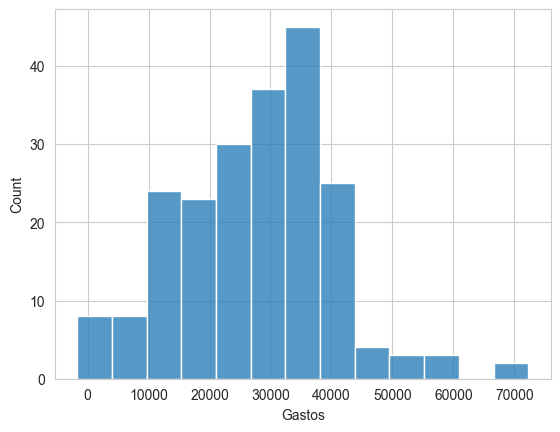

In [359]:
sns.histplot(df_final_3["Gastos"])

<Axes: xlabel='Quant_eventos', ylabel='Count'>

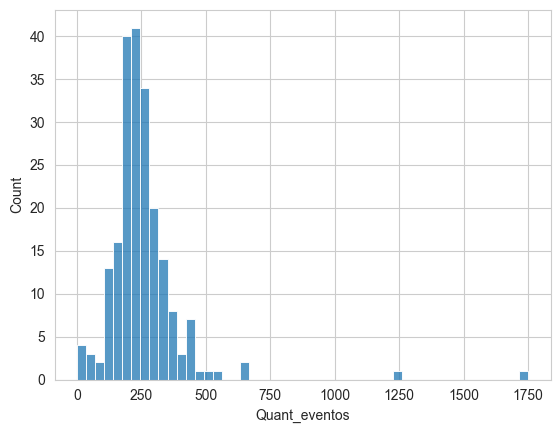

In [360]:
sns.histplot(df_final_3["Quant_eventos"])

<Axes: xlabel='Gastos', ylabel='Count'>

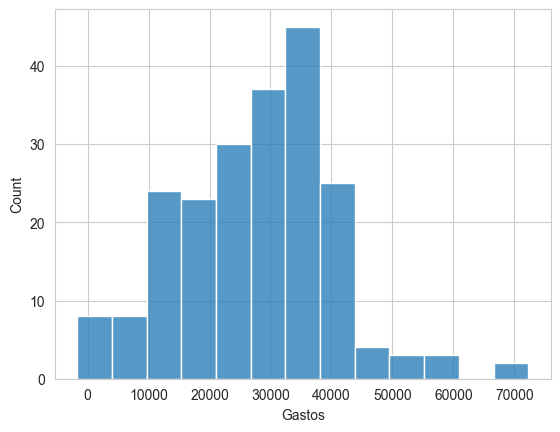

In [361]:
sns.histplot(df_final_3["Gastos"])

In [362]:
df_gastos_partidos = df_final_3.groupby('sgPartido')['Gastos'].sum()

Text(0, 0.5, 'Gastos (R$)')

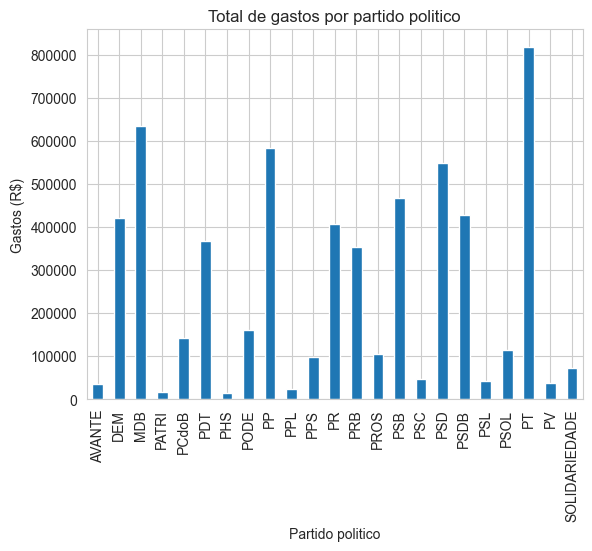

In [363]:
#Qual foi a distribuição de gastos conforme os partidos?
df_gastos_partidos.plot(kind='bar')
plt.title('Total de gastos por partido politico')
plt.xlabel('Partido politico')
plt.ylabel('Gastos (R$)')

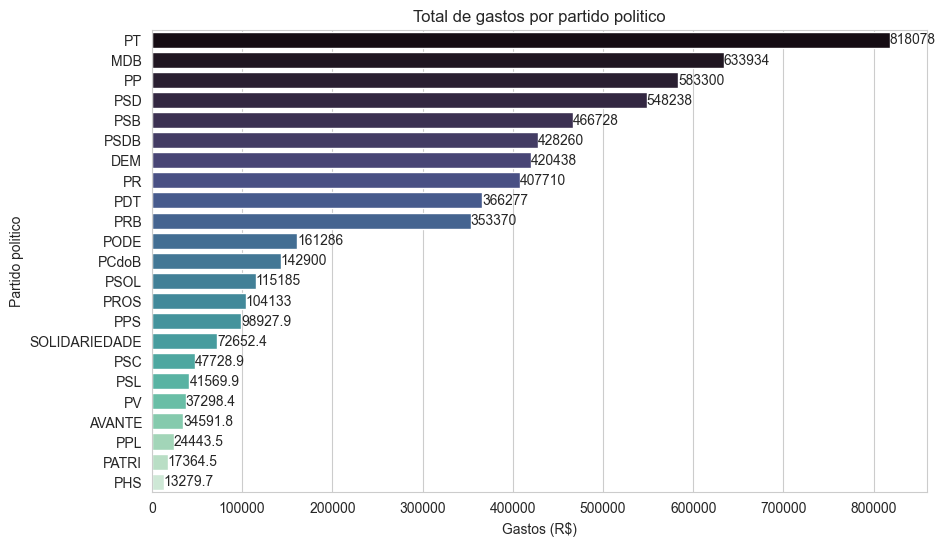

In [382]:
# Ordenando o DataFrame pelo valor dos gastos
df_gastos_partidos = df_gastos_partidos.sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
grafico = sns.barplot(y=df_gastos_partidos.index, x=df_gastos_partidos.values, palette='mako')

# Configurando os eixos
plt.title('Total de gastos por partido politico')
plt.xlabel('Gastos (R$)')
plt.ylabel('Partido politico')

# Adicionando os valores no topo de cada barra
for i in grafico.containers:
    grafico.bar_label(i, label_type='edge', fontsize=10)

plt.show()


Text(0, 0.5, 'Eventos')

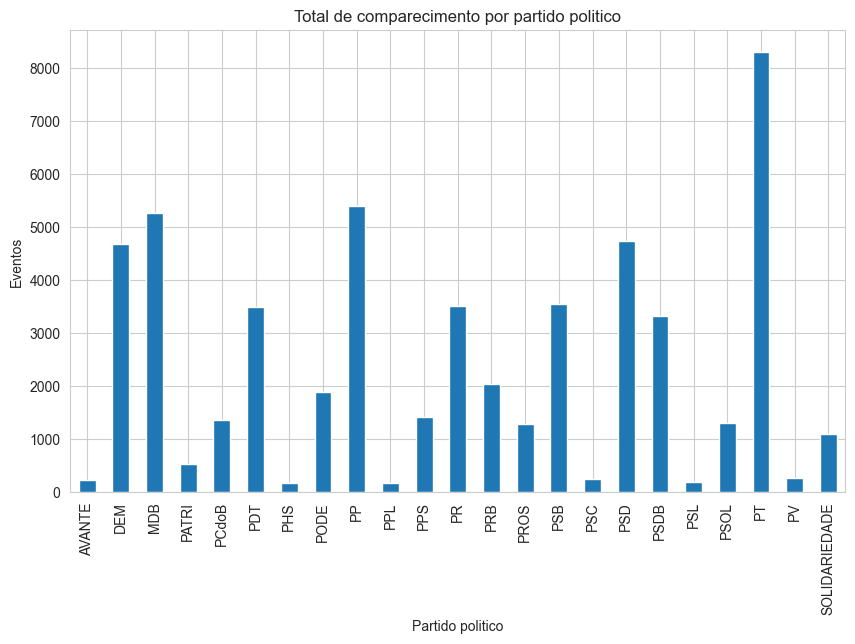

In [373]:
#Qual foi a distribuição de comparecimentos a eventos conforme os partidos?
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
df_festas_partidos = df_final_3.groupby('sgPartido')['Quant_eventos'].sum()
df_festas_partidos.plot(kind='bar')

# Configurando os eixos
plt.title('Total de comparecimento por partido politico')
plt.xlabel('Partido politico')
plt.ylabel('Eventos')

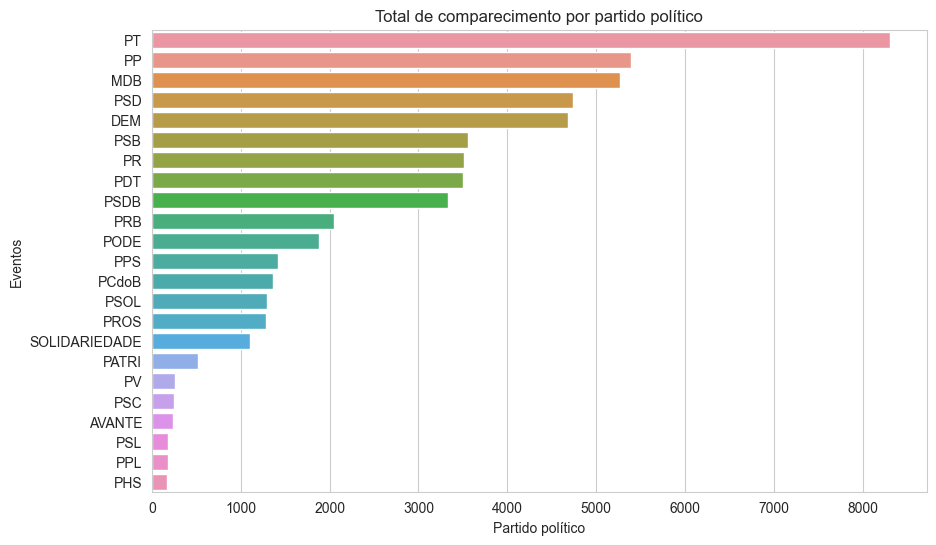

In [376]:
#Agrupando os dados por partido e calculando a soma dos eventos
df_festas_partidos2 = df_final_3.groupby('sgPartido')['Quant_eventos'].sum()

# Ordenando os partidos por quantidade de eventos
df_festas_partidos2 = df_festas_partidos2.sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(y=df_festas_partidos2.index, x=df_festas_partidos2.values)

for i, v in enumerate(df_festas_partidos.values):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

# Configurando os eixos e título
plt.title('Total de comparecimento por partido político')
plt.xlabel('Partido político')
plt.ylabel('Eventos')
plt.show()

In [377]:
df_festas_partidos2

sgPartido
PT               8309.0
PP               5398.0
MDB              5271.0
PSD              4746.0
DEM              4688.0
PSB              3559.0
PR               3516.0
PDT              3497.0
PSDB             3332.0
PRB              2049.0
PODE             1886.0
PPS              1419.0
PCdoB            1366.0
PSOL             1296.0
PROS             1280.0
SOLIDARIEDADE    1102.0
PATRI             524.0
PV                257.0
PSC               247.0
AVANTE            236.0
PSL               186.0
PPL               178.0
PHS               166.0
Name: Quant_eventos, dtype: float64

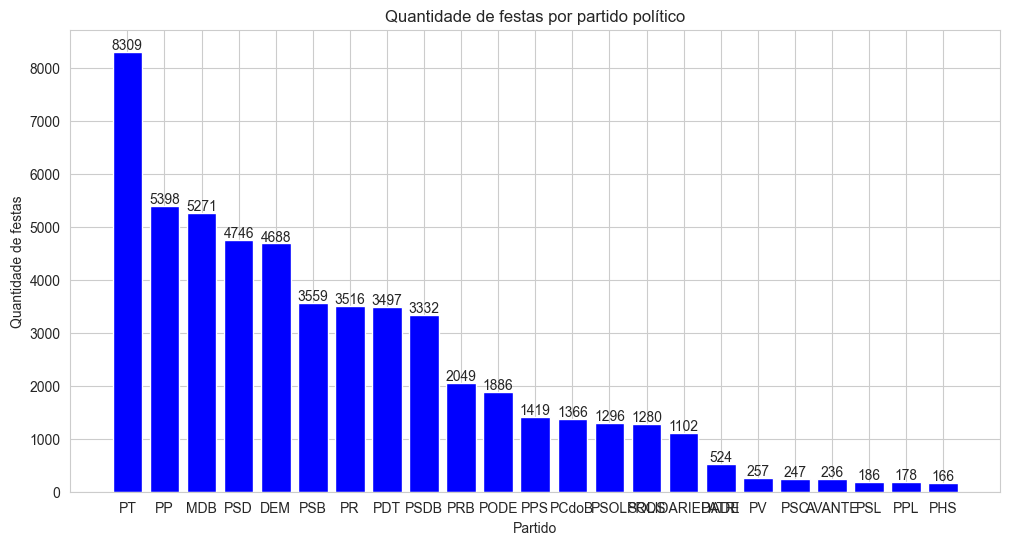

In [378]:

partidos = ['PT', 'PP', 'MDB', 'PSD', 'DEM', 'PSB', 'PR', 'PDT', 'PSDB', 'PRB',
            'PODE', 'PPS', 'PCdoB', 'PSOL', 'PROS', 'SOLIDARIEDADE', 'PATRI', 'PV',
            'PSC', 'AVANTE', 'PSL', 'PPL', 'PHS']
festas = [8309.0, 5398.0, 5271.0, 4746.0, 4688.0, 3559.0, 3516.0, 3497.0, 3332.0, 2049.0,
          1886.0, 1419.0, 1366.0, 1296.0, 1280.0, 1102.0, 524.0, 257.0, 247.0, 236.0, 186.0, 178.0, 166.0]

# Ordenando os partidos por quantidade de eventos
partidos, festas = zip(*sorted(zip(partidos, festas), key=lambda x: x[1], reverse=True))

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(partidos, festas, color='blue')

# Adicionando os valores numéricos acima de cada barra
for i, v in enumerate(festas):
    plt.text(i, v+50, str(int(v)), ha='center', fontsize=10)

# Configurando os eixos e título
plt.xlabel('Partido')
plt.ylabel('Quantidade de festas')
plt.title('Quantidade de festas por partido político')

plt.show()


Text(0, 0.5, 'Propostas')

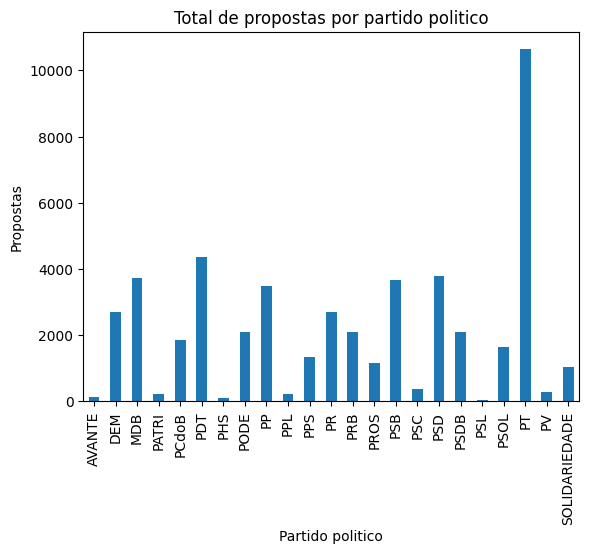

In [ ]:
#Qual foi a distribuição de propostas conforme os partidos?
df_gastos_partidos = df_final_3.groupby('sgPartido')['Quant_propostas'].sum()
df_gastos_partidos.plot(kind='bar')
plt.title('Total de propostas por partido politico')
plt.xlabel('Partido politico')
plt.ylabel('Propostas')

C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_5656\481162738.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x='sgPartido', y='Gastos', data=dfg, ci=None)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U6'), dtype('float64')) -> None

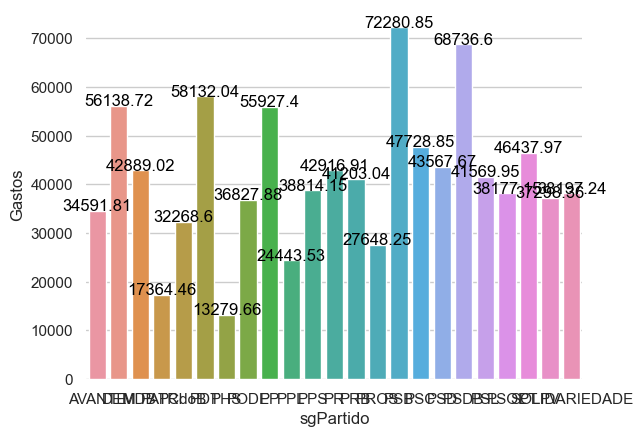

In [ ]:

# criar um dataframe com os dados necessários
dfg = df_final_3.groupby('sgPartido').apply(lambda x: x.nlargest(1, 'Gastos')).reset_index(drop=True)

# criar o gráfico de barras com rótulo de dados e linha de tendência
sns.set(style='whitegrid')
g = sns.barplot(x='sgPartido', y='Gastos', data=dfg, ci=None)
sns.despine(left=True, bottom=True)

for index, row in dfg.iterrows():
    g.text(row.name, row.Gastos, round(row.Gastos, 2), color='black', ha="center")
    
sns.regplot(x='sgPartido', y='Gastos', data=dfg, scatter=False, color='blue')



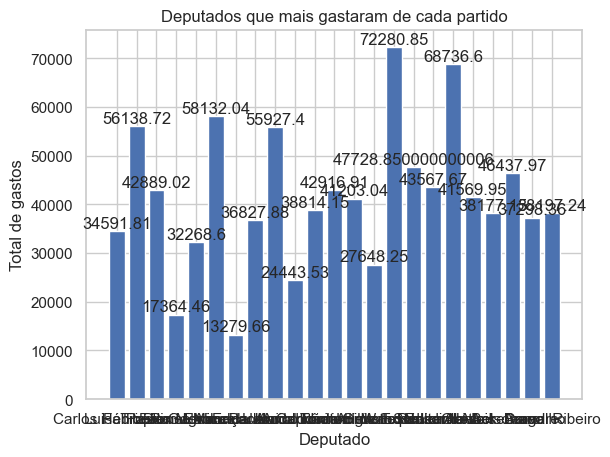

In [ ]:
# criar DataFrame exemplo
df_analise = df_final_3.loc[:,['sgPartido', 'Parlamentar', 'Gastos']]

# agrupar por partido e nome do parlamentar e somar os gastos
dfgp = df_analise.groupby(['sgPartido', 'Parlamentar'])['Gastos'].sum()

# converter o índice em colunas
dfgp = dfgp.reset_index()

# obter o índice do maior gasto de cada partido
idx_max_gasto = dfgp.groupby('sgPartido')['Gastos'].idxmax()

# selecionar apenas as linhas correspondentes aos maiores gastos de cada partido
df_max_gastos_partido = dfgp.loc[idx_max_gasto]

# criar gráfico de barras
plt.bar(df_max_gastos_partido['Parlamentar'], df_max_gastos_partido['Gastos'])

# adicionar rótulos aos dados
for i, v in enumerate(df_max_gastos_partido['Gastos']):
    plt.text(i, v, str(v), ha='center', va='bottom')

# adicionar título e rótulos aos eixos
plt.title('Deputados que mais gastaram de cada partido')
plt.xlabel('Deputado')
plt.ylabel('Total de gastos')

# exibir gráfico
plt.show()


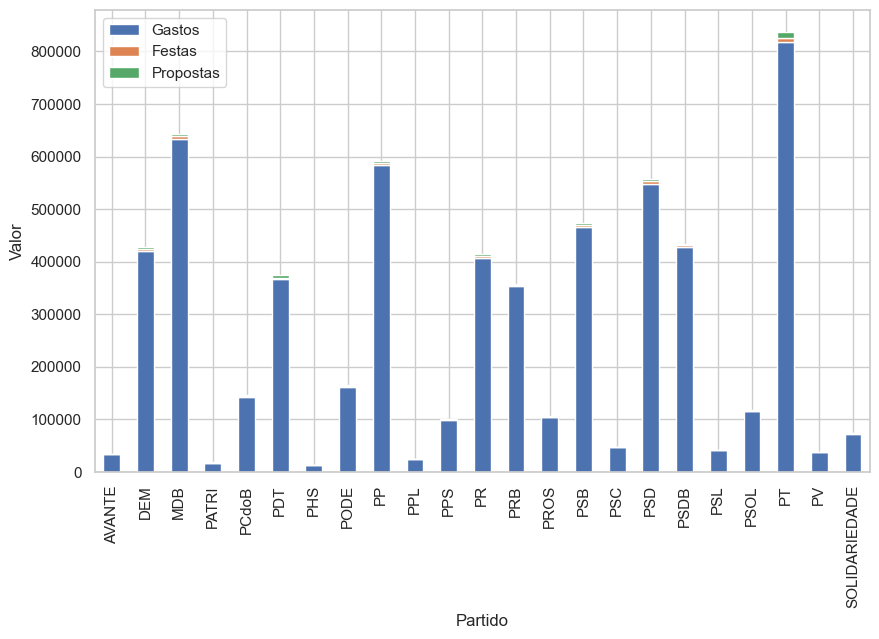

In [ ]:

# agrupando o dataframe pelos partidos e somando as colunas de gastos, festas e propostas
df_grouped = df_final_3.groupby('sgPartido').agg({'Gastos': 'sum', 'Quant_eventos': 'sum', 'Quant_propostas': 'sum'})

# criando um novo dataframe com os valores agregados
df_plot = pd.DataFrame({'Gastos': df_grouped['Gastos'], 'Festas': df_grouped['Quant_eventos'], 'Propostas': df_grouped['Quant_propostas']}, index=df_grouped.index)

# plotando o gráfico de barras empilhadas
ax = df_plot.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Partido')
ax.set_ylabel('Valor')

plt.show()


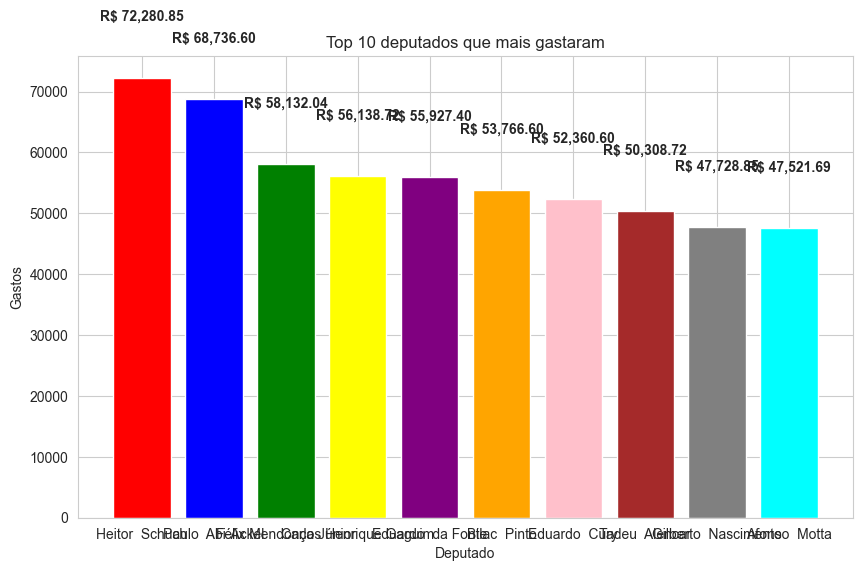

In [398]:
# Selecionar os 10 deputados que mais gastaram
top_deputados = df_final_3.sort_values("Gastos", ascending=False).nlargest(10, "Gastos")

# Definir as cores das barras
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']

# Aumentar o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras
plt.bar(top_deputados["Parlamentar"], top_deputados["Gastos"], color=colors)

# Adicionar os valores no topo das barras
for i, v in enumerate(top_deputados["Gastos"]):
    plt.text(i, v + 10000, f"R$ {v:,.2f}", ha="center", va="center", fontweight="bold")
    
# Personalizar o gráfico
plt.xlabel("Deputado")
plt.ylabel("Gastos")
plt.title("Top 10 deputados que mais gastaram")

# Mostrar o gráfico
plt.show()


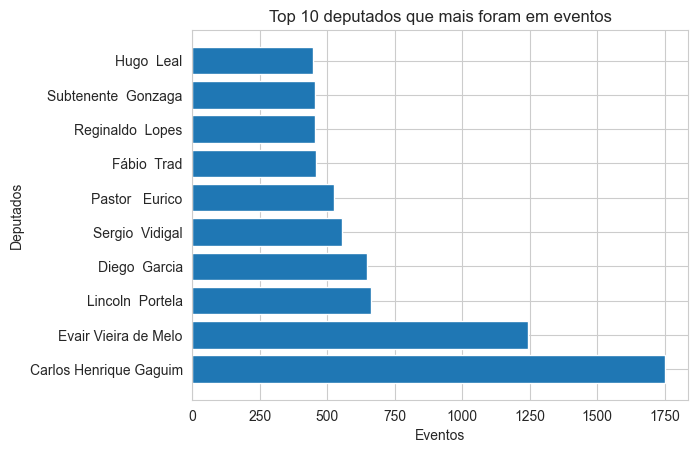

In [400]:
# Selecionar os 10 deputados que mais foram em eventos
top_deputados = df_final_3.nlargest(10, "Quant_eventos")

# Plotar o gráfico de barras
plt.barh(top_deputados["Parlamentar"], top_deputados["Quant_eventos"])

# Personalizar o gráfico
plt.xlabel("Eventos")
plt.ylabel("Deputados")
plt.title("Top 10 deputados que mais foram em eventos")
plt.show()

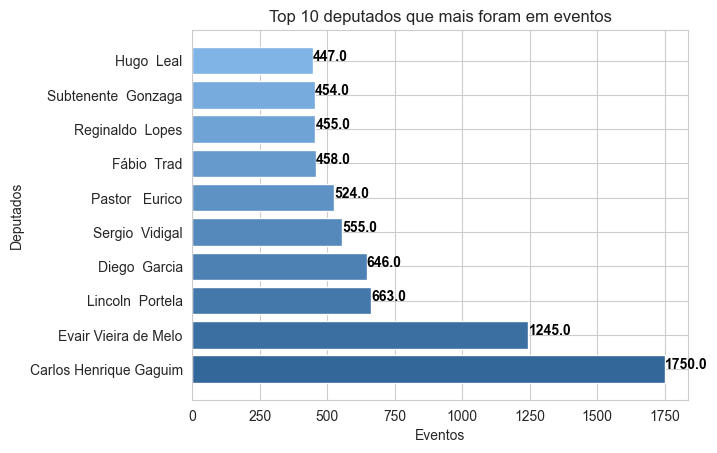

In [407]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Selecionar os 10 deputados que mais foram em eventos
top_deputados = df_final_3.nlargest(10, "Quant_eventos")

# Definir as cores do gradiente
colors = [(0.2, 0.4, 0.6), (0.5, 0.7, 0.9)]

# Criar o gradiente de cores
cmap = LinearSegmentedColormap.from_list('my_cmap', colors)

# Plotar o gráfico de barras com gradiente de cores
plt.barh(top_deputados["Parlamentar"], top_deputados["Quant_eventos"], color=cmap(np.linspace(0, 1, len(top_deputados))))

# Adicionar os valores no topo das barras
for i, v in enumerate(top_deputados["Quant_eventos"]):
    plt.text(v + 0.2, i, str(v), color='black', fontweight='bold')

# Personalizar o gráfico
plt.xlabel("Eventos")
plt.ylabel("Deputados")
plt.title("Top 10 deputados que mais foram em eventos")

plt.show()


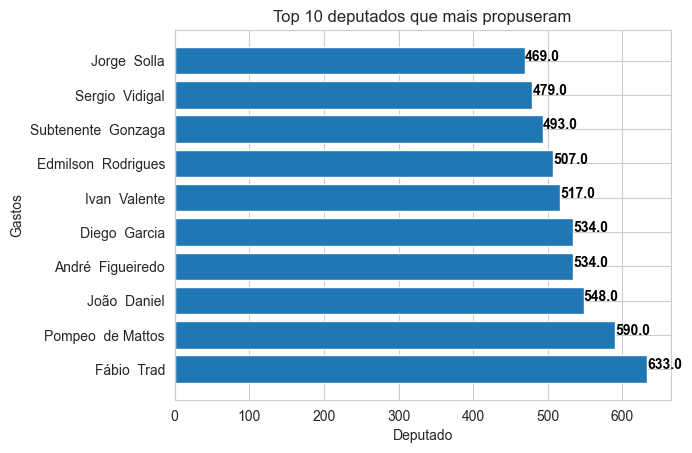

In [408]:
# Selecionar os 10 deputados que mais fizeram propostas
top_deputados = df_final_3.nlargest(10, "Quant_propostas")


# Plotar o gráfico de barras
plt.barh(top_deputados["Parlamentar"], top_deputados["Quant_propostas"])

# Adicionar os valores no topo das barras
for i, v in enumerate(top_deputados["Quant_propostas"]):
    plt.text(v + 0.2, i, str(v), color='black', fontweight='bold')
 
# Personalizar o gráfico
plt.xlabel("Deputado")
plt.ylabel("Gastos")
plt.title("Top 10 deputados que mais propuseram")
plt.show()

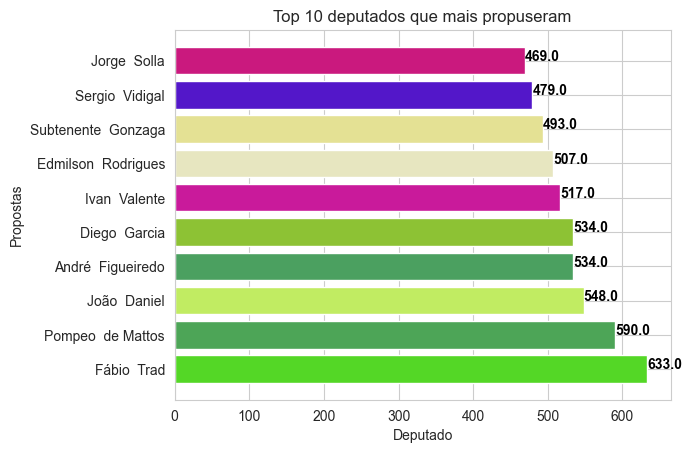

In [409]:

import random

# Selecionar os 10 deputados que mais fizeram propostas
top_deputados = df_final_3.nlargest(10, "Quant_propostas")

# Gerar cores aleatórias em gradiente
colors = []
for i in range(len(top_deputados)):
    color = [random.random() for _ in range(3)]
    colors.append(color)

# Criar o gradiente de cores
cmap = LinearSegmentedColormap.from_list('my_cmap', colors)

# Plotar o gráfico de barras com gradiente de cores
plt.barh(top_deputados["Parlamentar"], top_deputados["Quant_propostas"], color=cmap(np.linspace(0, 1, len(top_deputados))))

# Adicionar os valores no topo das barras
for i, v in enumerate(top_deputados["Quant_propostas"]):
    plt.text(v + 0.2, i, str(v), color='black', fontweight='bold')

# Personalizar o gráfico
plt.xlabel("Deputado")
plt.ylabel("Propostas")
plt.title("Top 10 deputados que mais propuseram")

plt.show()
